In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Configuring to display all the rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# loading dataset
df = pd.read_csv('cleaned_data.csv')
print(df.shape)

(742, 32)


In [4]:
# visualise the content
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,Provided_Salary,Min_Salary_Estimate,Max_Salary_Estimate,Average_Salary_Estimate,company_txt,job_state,same_state,company_age,python,excel,sas,spark,tableau,aws,big data,R_lang,ownership
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Researc,NM,0,47,1,1,1,0,1,0,0,0,Private
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical Syste,MD,0,36,1,0,0,0,0,0,0,0,Other Organization
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe,FL,1,10,1,1,1,1,0,0,1,1,Private
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNN,WA,1,55,1,0,0,0,0,0,0,0,Government
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solution,NY,1,22,1,1,1,0,0,0,0,0,Private


In [5]:
# Checking different job title
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [6]:
# There are lots of different job titles in the set, therefore defining a function which will assign general umberlla title
def job_title_simplifier(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower() or 'data sciene' in title.lower():
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    if 'analyst' in title.lower() or 'analytics' in title.lower() or 'modeler' in title.lower():
        return 'Data Analyst'
    elif 'machine learning' in title.lower():
        return 'Machine learning Engineer'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    else:
        return 'na'

# Suffix name classification
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'Senior'
    elif 'associate' in title.lower():
        return 'Associate'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'Jr'
    else:
        return 'na'

In [7]:
# Making new column job_title
df['job_title'] = df['Job Title'].apply(job_title_simplifier)
df['job_title'].value_counts()

Data Scientist               438
Data Analyst                 133
Data Engineer                119
na                            24
Machine learning Engineer     12
Director                       9
Manager                        7
Name: job_title, dtype: int64

In [8]:
# Making new column seniority
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na           492
Senior       220
Associate     27
Jr             3
Name: seniority, dtype: int64

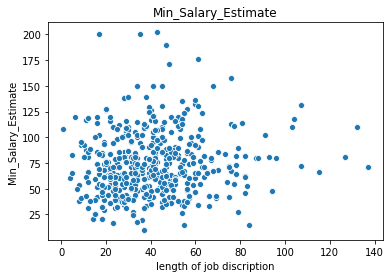

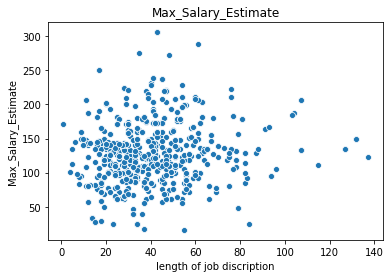

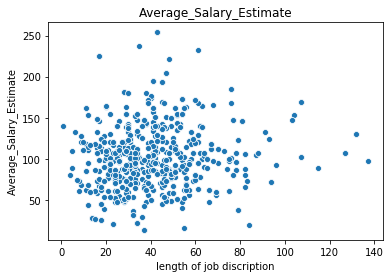

In [9]:
# let's check if the job descriptive length affect the salary 

def job_descrp_len_analyz(data, column):
    X=data.copy()
    X['len'] = X[column].apply(lambda x : len(x.split(',')))
    for col in ['Min_Salary_Estimate', 'Max_Salary_Estimate', 'Average_Salary_Estimate']:
        sns.scatterplot(X['len'], X[col])
        plt.title(col)
        plt.xlabel('length of job discription')
        plt.ylabel(col)
        plt.show()
        
job_descrp_len_analyz(df, 'Job Description')

In [10]:
# Let's check the perason correlation cofficient between columns 
def co_rel(data, column):
    X=data.copy()
    X['len'] = X[column].apply(lambda x : len(x.split(',')))
    print('Pearson correlation cofficeint')
    for col in ['Min_Salary_Estimate', 'Max_Salary_Estimate', 'Average_Salary_Estimate']:
        print(f"{col} : {X['len'].corr(X[col], method='pearson')}")
    
co_rel(df, 'Job Description')

Pearson correlation cofficeint
Min_Salary_Estimate : 0.12657879226304578
Max_Salary_Estimate : 0.14036307058369385
Average_Salary_Estimate : 0.1366363185885655


* Our assumption are wrong and the length of job description does not affect the salary.
* Company are basically loocking for narrow sets of skills but may be proficient in it.

In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Provided_Salary', 'Min_Salary_Estimate',
       'Max_Salary_Estimate', 'Average_Salary_Estimate', 'company_txt',
       'job_state', 'same_state', 'company_age', 'python', 'excel', 'sas',
       'spark', 'tableau', 'aws', 'big data', 'R_lang', 'ownership',
       'job_title', 'seniority'],
      dtype='object')

In [12]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [13]:
# remove extra space in job_state and fixing los Angeles
df['job_state']=df['job_state'].apply(lambda x : x.strip() if x.strip() != 'Los Angeles' else 'CA')
df['job_state'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [14]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,Provided_Salary,Min_Salary_Estimate,Max_Salary_Estimate,Average_Salary_Estimate,company_txt,job_state,same_state,company_age,python,excel,sas,spark,tableau,aws,big data,R_lang,ownership,job_title,seniority
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Researc,NM,0,47,1,1,1,0,1,0,0,0,Private,Data Scientist,na
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical Syste,MD,0,36,1,0,0,0,0,0,0,0,Other Organization,Data Scientist,na
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe,FL,1,10,1,1,1,1,0,0,1,1,Private,Data Scientist,na
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNN,WA,1,55,1,0,0,0,0,0,0,0,Government,Data Scientist,na
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solution,NY,1,22,1,1,1,0,0,0,0,0,Private,Data Scientist,na


In [15]:
# Converting hourly wages to annual
df['Min_Salary_Estimate'] = df.apply(lambda x : x['Min_Salary_Estimate']*2 if 
                                     x['hourly']==1 else x['Min_Salary_Estimate'], axis=1)

df['Max_Salary_Estimate'] = df.apply(lambda x : x['Max_Salary_Estimate']*2 if 
                                     x['hourly']==1 else x['Max_Salary_Estimate'], axis=1)

df['Average_Salary_Estimate'] = df.apply(lambda x : x['Average_Salary_Estimate']*2 if 
                                     x['hourly']==1 else x['Average_Salary_Estimate'], axis=1)

df[df['hourly']==1][['Min_Salary_Estimate', 'Max_Salary_Estimate', 'Average_Salary_Estimate']]

,Min_Salary_Estimate,Max_Salary_Estimate,Average_Salary_Estimate
165,34,48,41.0
177,42,68,55.0
197,36,50,43.0
202,42,68,55.0
210,30,50,40.0
246,34,48,41.0
271,42,68,55.0
337,36,50,43.0
345,48,78,63.0
357,42,68,55.0


In [16]:
# Number of unique labels in Industry, Sector and ownership columns and removing extra space 
for col in ['Industry', 'Sector', 'ownership']:
    print(f'{col} : {df[col].nunique()}')
    df[col]=df[col].apply(lambda x : x.strip())

Industry : 60
Sector : 25
ownership : 11


In [17]:
# unique labels in Sector and ownership columns and removing extra space
for col in ['Sector', 'ownership']:
    print(f'{col} : {df[col].unique()}','\n')

Sector : ['Aerospace & Defense' 'Health Care' 'Business Services'
 'Oil, Gas, Energy & Utilities' 'Real Estate' 'Finance'
 'Information Technology' 'Retail' 'Biotech & Pharmaceuticals' 'Media'
 'Insurance' 'Transportation & Logistics' 'Telecommunications' '-1'
 'Manufacturing' 'Mining & Metals' 'Government' 'Education'
 'Agriculture & Forestry' 'Travel & Tourism' 'Non-Profit'
 'Arts, Entertainment & Recreation' 'Construction, Repair & Maintenance'
 'Accounting & Legal' 'Consumer Services'] 

ownership : ['Private' 'Other Organization' 'Government' 'Public' 'Hospital'
 'Subsidiary or Business Segment' 'Nonprofit Organization' 'Unknown'
 'College / University' 'School / School District' '1'] 



* we have missing values in Scetor column and should be replaced with unknown labels
* There are repeated labels in ownership column, therefore need to gather repeated labels into one label

In [18]:
# Sector column
df['Sector'] = df['Sector'].replace('-1','unknown')

# ownership column
dict = {'Government':'Public', '1':'Unknown'}
df['ownership'] = df['ownership'].replace('Government','Public')
df['ownership'] = df['ownership'].replace('1','Unknown')

# For checking
for col in ['Sector', 'ownership']:
    print(f'{col} : {df[col].unique()}','\n')

Sector : ['Aerospace & Defense' 'Health Care' 'Business Services'
 'Oil, Gas, Energy & Utilities' 'Real Estate' 'Finance'
 'Information Technology' 'Retail' 'Biotech & Pharmaceuticals' 'Media'
 'Insurance' 'Transportation & Logistics' 'Telecommunications' 'unknown'
 'Manufacturing' 'Mining & Metals' 'Government' 'Education'
 'Agriculture & Forestry' 'Travel & Tourism' 'Non-Profit'
 'Arts, Entertainment & Recreation' 'Construction, Repair & Maintenance'
 'Accounting & Legal' 'Consumer Services'] 

ownership : ['Private' 'Other Organization' 'Public' 'Hospital'
 'Subsidiary or Business Segment' 'Nonprofit Organization' 'Unknown'
 'College / University' 'School / School District'] 



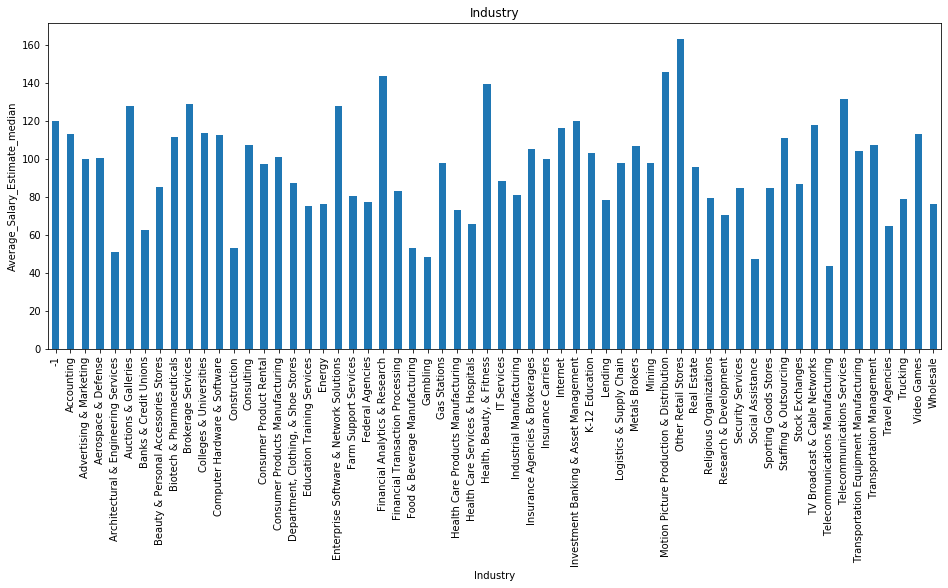

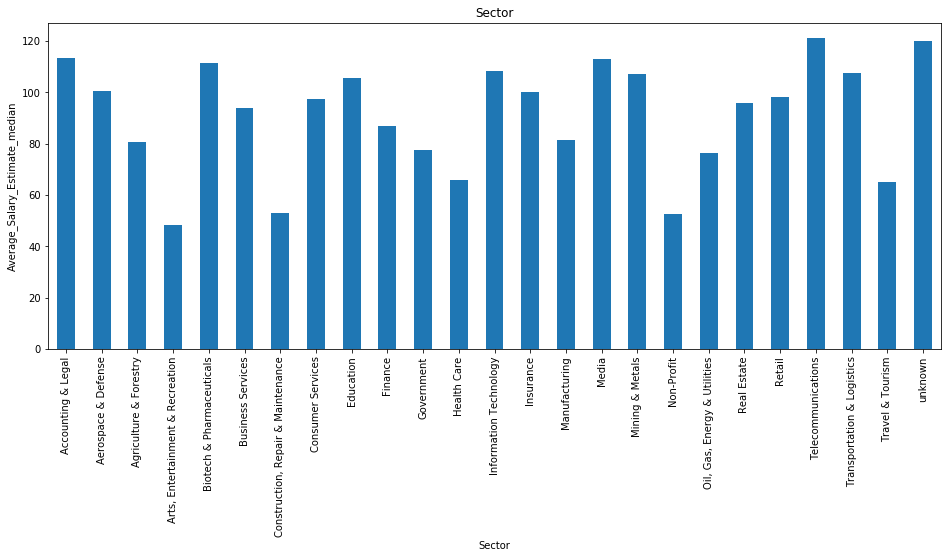

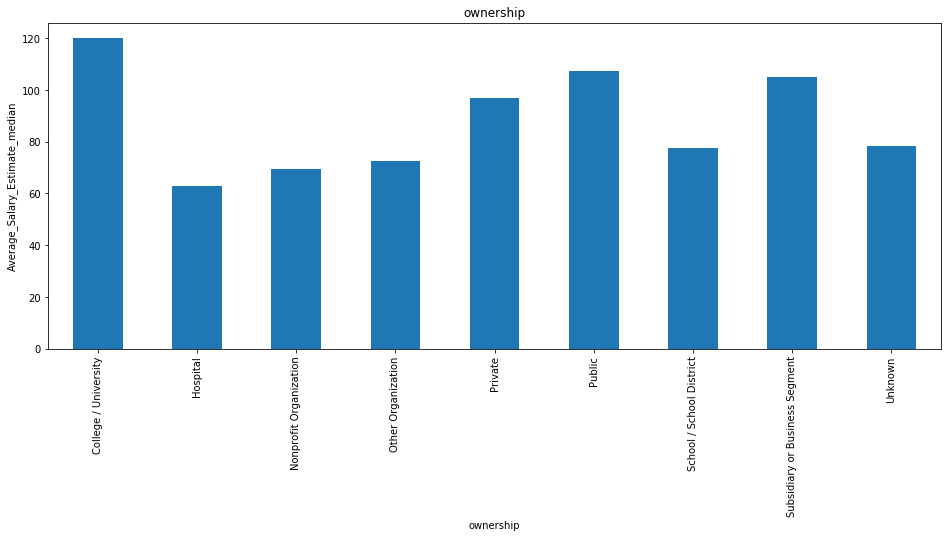

In [19]:
# relationship between target columns and Industry, Sector and ownership columns
def visual_analyz(dataset, column):
    X=dataset.copy()
    df.groupby(column)['Average_Salary_Estimate'].median().plot.bar(figsize=(16,6))
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Average_Salary_Estimate_median')
    plt.show()

for col in ['Industry', 'Sector', 'ownership']:
    visual_analyz(df, col)

#### There tends to be relationship between average salary and Industry, Sector and ownership columns but the relationship is not monotonic. Monotonic relation can be created

In [20]:
# Competitor counts
df['competitor_counts'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)
df['competitor_counts']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

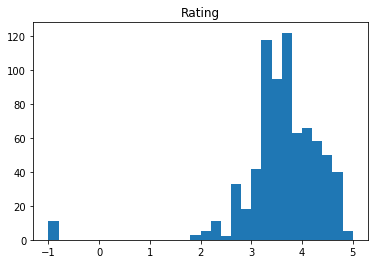

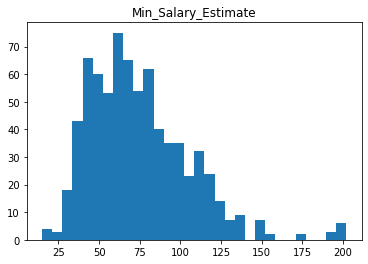

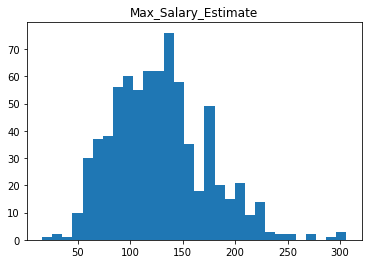

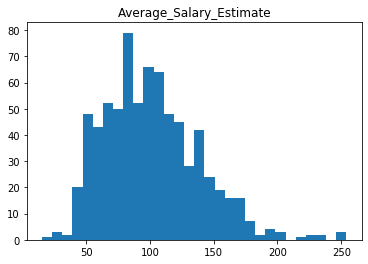

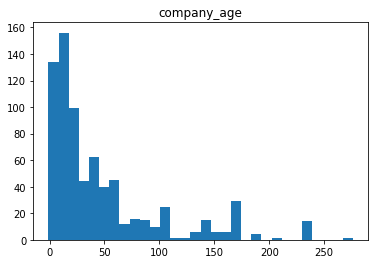

In [21]:
def num_dist_analyz(data, column):
    X = data.copy()
    plt.hist(X[column], bins=30)
    plt.title(column)
    plt.show()

for col in ['Rating', 'Min_Salary_Estimate', 'Max_Salary_Estimate', 'Average_Salary_Estimate', 'company_age']:
    num_dist_analyz(df, col)

* Column Rating is negatively skewed
* Min_Salary_Estimate, Max_Salary_Estimate and Average_Salary_Estimate are little bit of right skewed
* Column company_age is very much right skewed

##### let's see if log transformation fix the distribution problem

C:\Users\prash\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\prash\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\prash\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


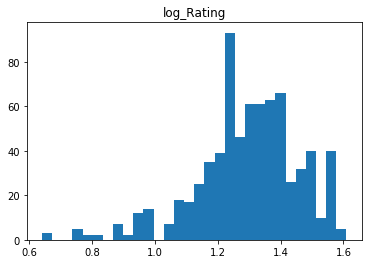

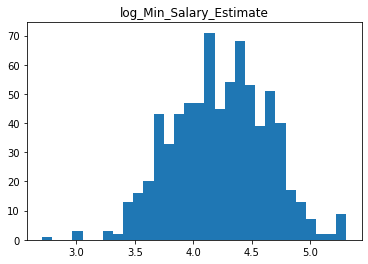

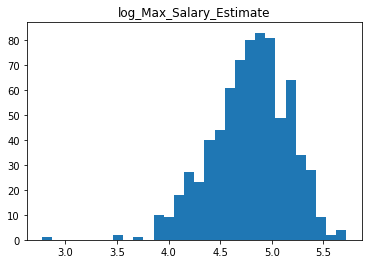

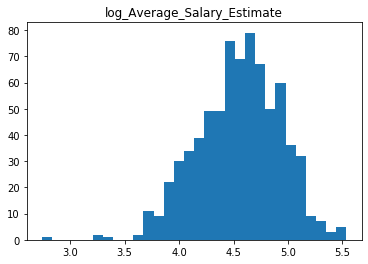

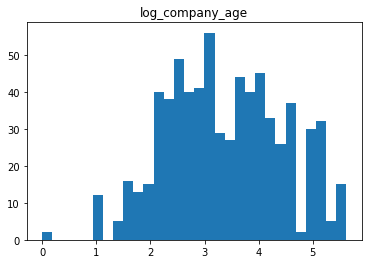

In [22]:
def num_dist_analyz(data, column):
    X = data.copy()
    plt.hist(np.log(X[column]), bins=30)
    plt.title('log_'+str(column))
    plt.show()

for col in ['Rating', 'Min_Salary_Estimate', 'Max_Salary_Estimate', 'Average_Salary_Estimate', 'company_age']:
    num_dist_analyz(df, col)

* The log transformation made worse for Min_Salary_Estimate, Max_Salary_Estimate and Average_Salary_Estimate column but did pretty much good job for company_age and Rating column

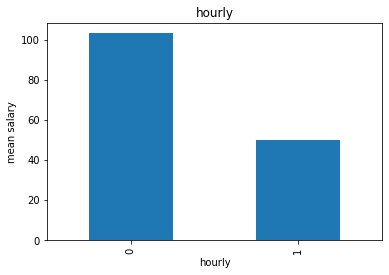

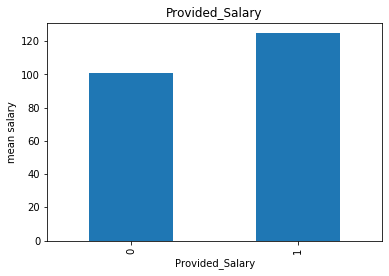

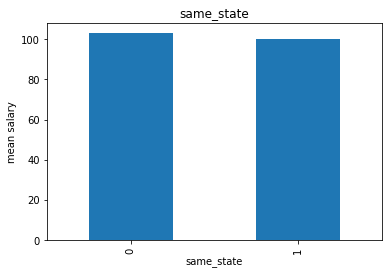

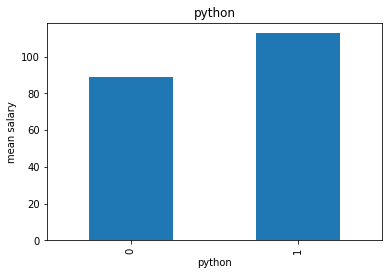

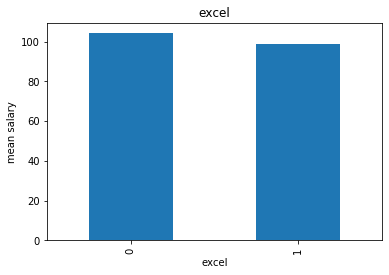

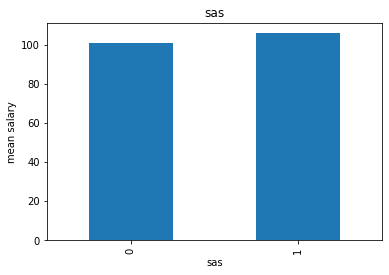

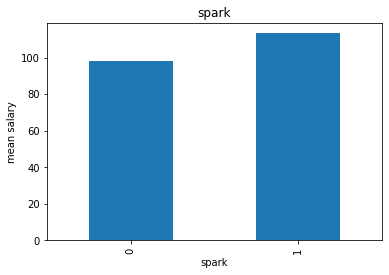

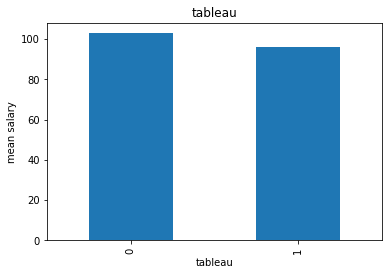

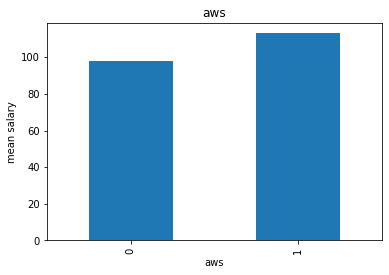

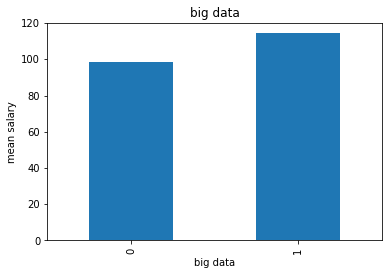

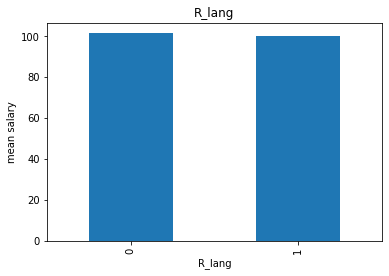

In [23]:
# Separating those columns which have only 2 labels
binary_label_col = [var for var in df.columns if df[var].nunique() <= 2]

# Relationship between average salary and binary indicators columns
def bin_analyz(data, column):
    X = data.copy()
    X.groupby(column)['Average_Salary_Estimate'].mean().plot.bar()
    plt.title(column)
    plt.ylabel('mean salary')
    plt.show()
    
for col in binary_label_col:
    bin_analyz(df, col)

* Not all columns showing great difference in there mean salary

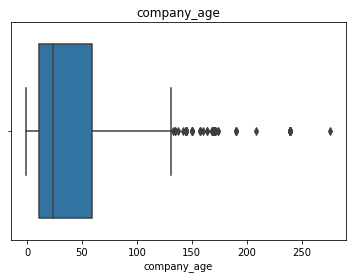

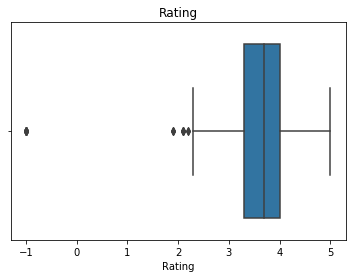

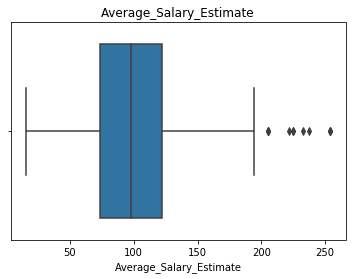

In [24]:
def box_plot(data, column):
    X = data.copy()
    sns.boxplot(X[column])
    plt.title(column)
    plt.show()
    
for col in ['company_age', 'Rating', 'Average_Salary_Estimate']:
    box_plot(df, col)

* Some of the companies are very old
* Negative values in rating showing missing data, there are companies having low rating
* Some of the companies are providing high annual packages 

In [25]:
# Correlation
df[['Rating', 'same_state', 'company_age', 'Average_Salary_Estimate']].corr()

,Rating,same_state,company_age,Average_Salary_Estimate
Rating,1.000000,0.085033,0.021655,0.012517
same_state,0.085033,1.000000,-0.166680,-0.040823
company_age,0.021655,-0.166680,1.000000,0.021996
Average_Salary_Estimate,0.012517,-0.040823,0.021996,1.000000


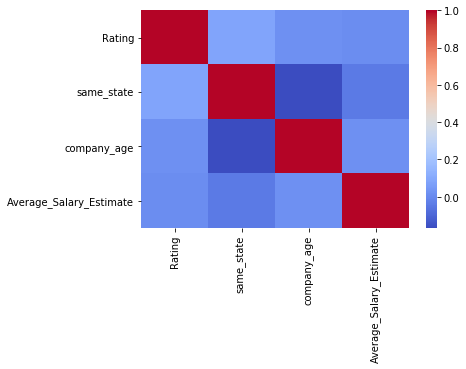

In [26]:
# Correlation visualisation
plt.figure(figsize=(6,4))
sns.heatmap(df[['Rating', 'same_state', 'company_age', 'Average_Salary_Estimate']].corr(), cmap='coolwarm')
plt.show()

* The variables are very less correlated with average salary

        Average_Salary_Estimate
Rating                         
-1.0                 136.181818
 5.0                 134.700000
 2.5                 120.000000
 4.5                 117.714286
 4.1                 116.368421
 3.9                 113.071429
 2.6                 109.083333
 4.4                 108.606061
 4.0                 107.170213
 3.2                 106.928571
 3.7                 105.680328
 3.5                 104.897959
 4.7                 103.983871
 3.3                 103.897436
 4.3                 102.468750
 4.2                 100.442308
 2.2                  97.750000
 3.8                  97.418033
 4.6                  97.250000
 2.1                  95.900000
 3.4                  93.465909
 3.6                  89.945652
 1.9                  87.500000
 3.1                  86.580000
 3.0                  85.588235
 2.7                  85.178571
 2.8                  83.928571
 2.3                  81.500000
 2.9                  81.138889
 4.8    

(2, 5)

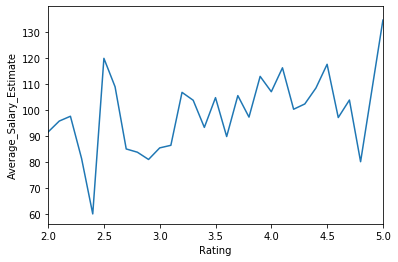

In [27]:
rating_avg_salary=pd.pivot_table(df, values='Average_Salary_Estimate', index='Rating',
               aggfunc='mean').sort_values(by='Average_Salary_Estimate', ascending=False)

print(rating_avg_salary)
sns.lineplot(y=rating_avg_salary['Average_Salary_Estimate'],x=rating_avg_salary.index)
plt.xlim(2,5)

* Ignoring the missing values, overall we can see that the highest rating companies are offering more as compare to less rated companies

graph for Industry: total = 60


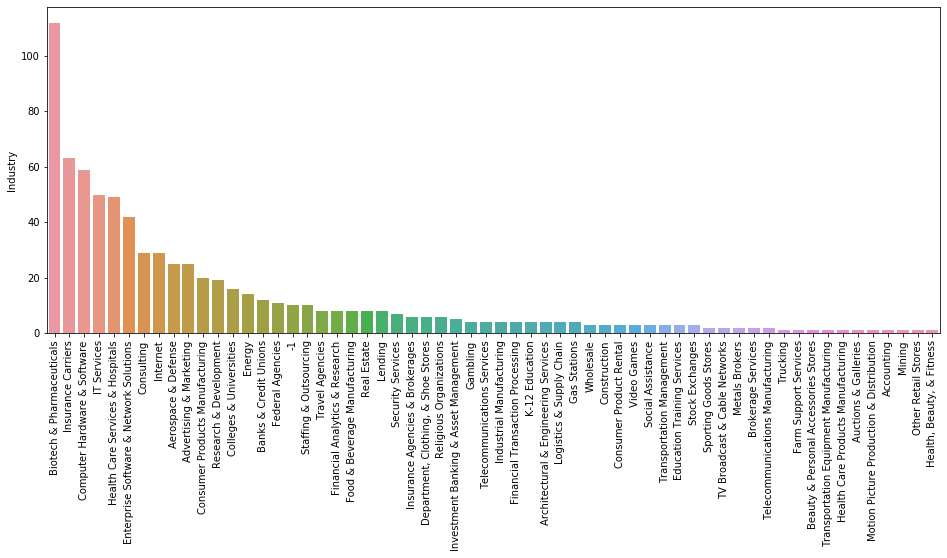

graph for Sector: total = 25


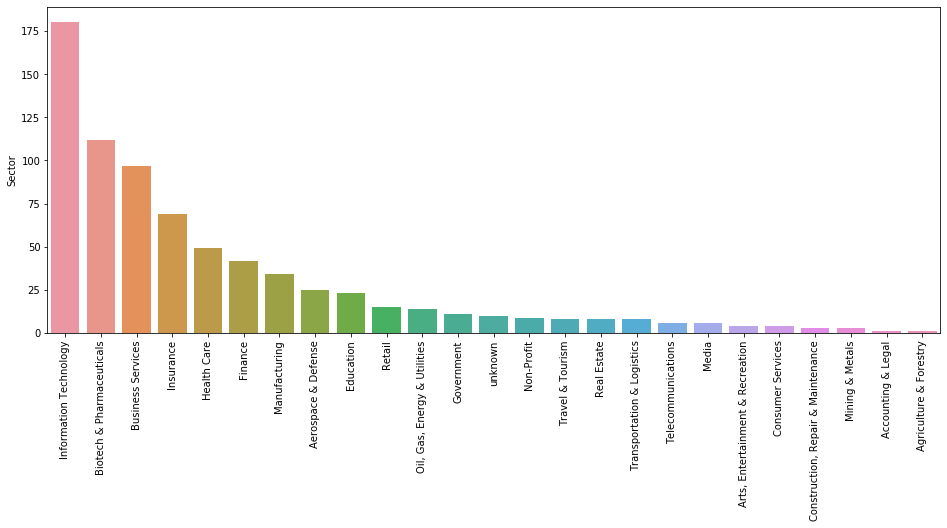

graph for Revenue: total = 14


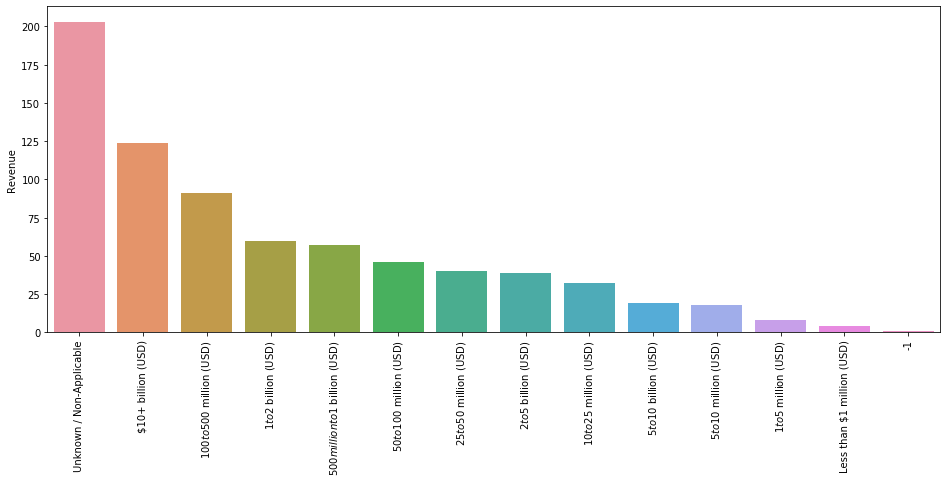

graph for competitor_counts: total = 5


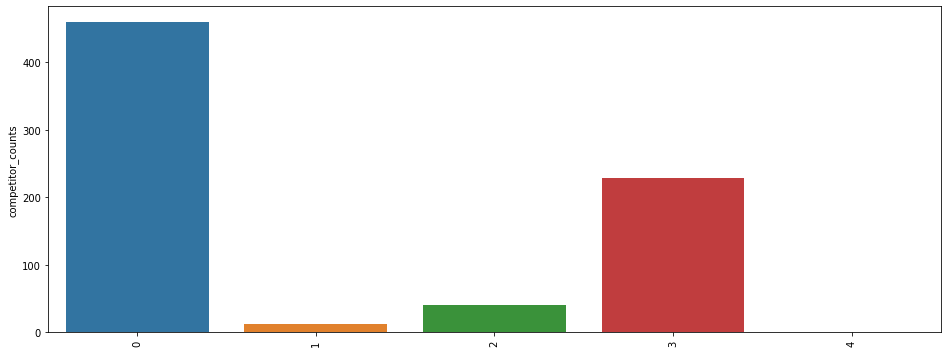

graph for Location: total = 200


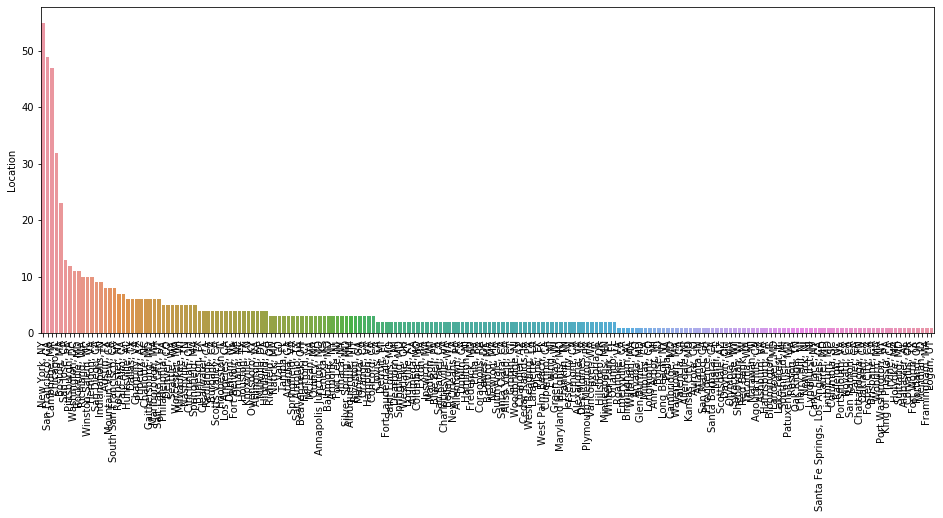

graph for Headquarters: total = 198


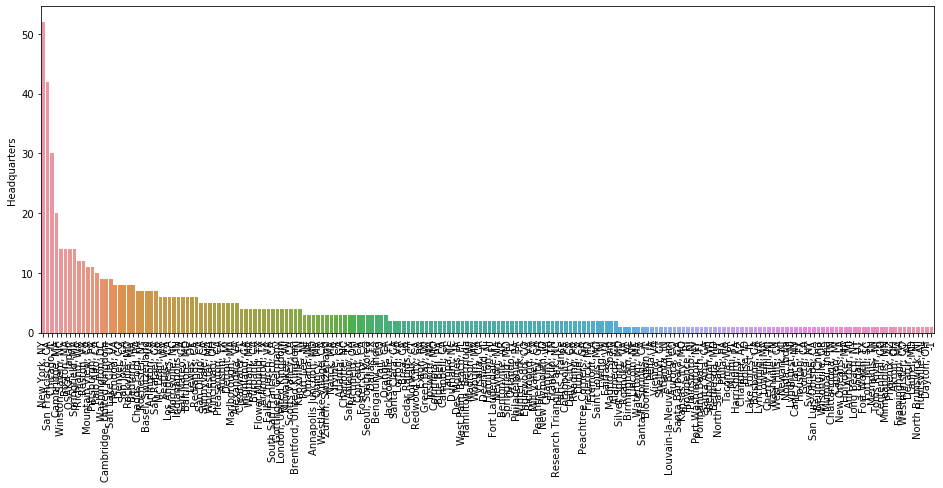

graph for job_state: total = 37


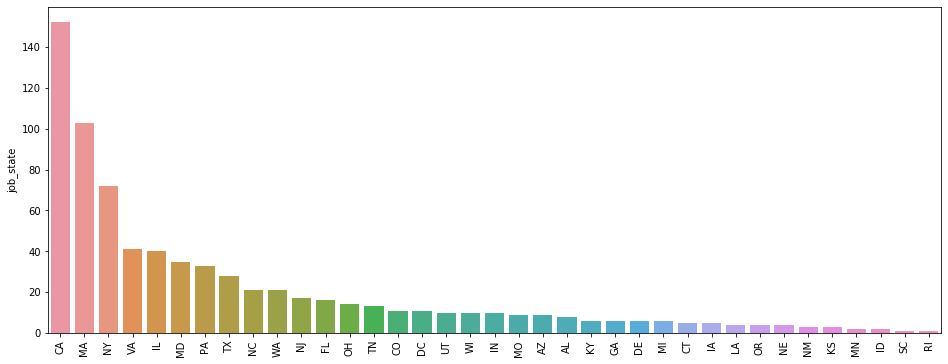

graph for ownership: total = 9


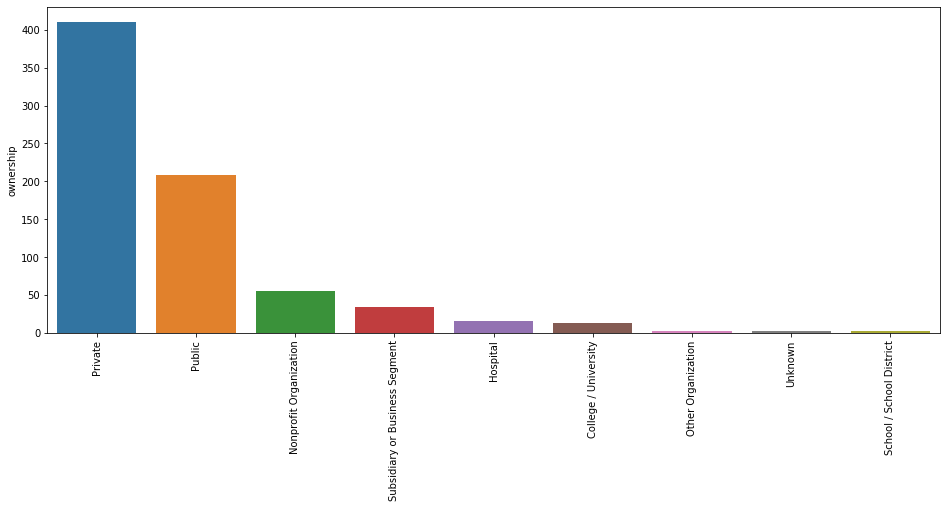

graph for job_title: total = 7


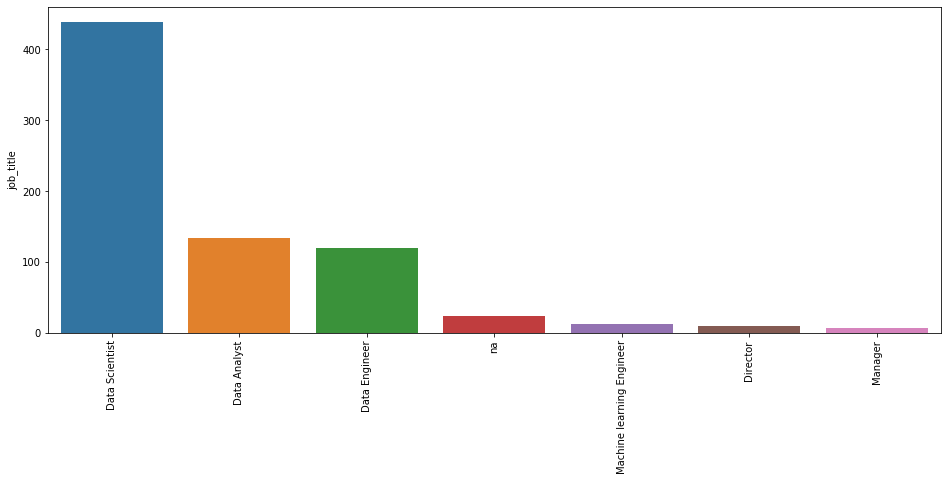

graph for seniority: total = 4


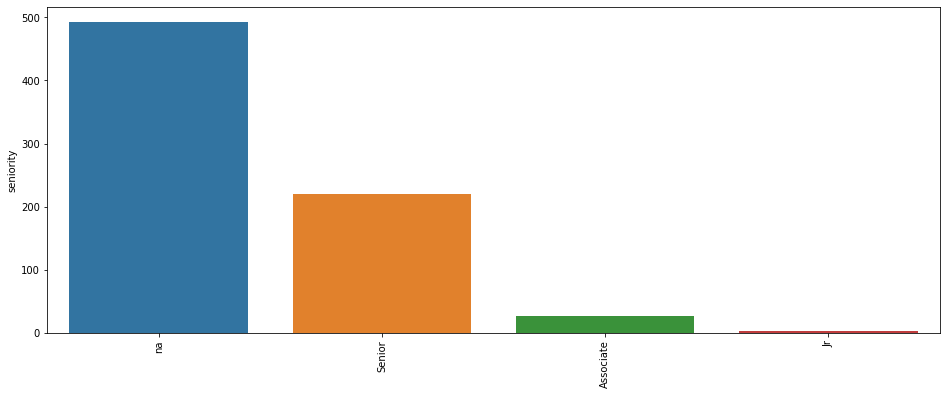

In [28]:
# Counts of labels in categorical columns
var = ['Industry', 'Sector', 'Revenue', 'competitor_counts','Location',
 'Headquarters', 'job_state', 'ownership', 'job_title', 'seniority']

for col in var:
    cat_num = df[col].value_counts()
    print("graph for %s: total = %d" % (col, len(cat_num)))
    plt.figure(figsize=(16,6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


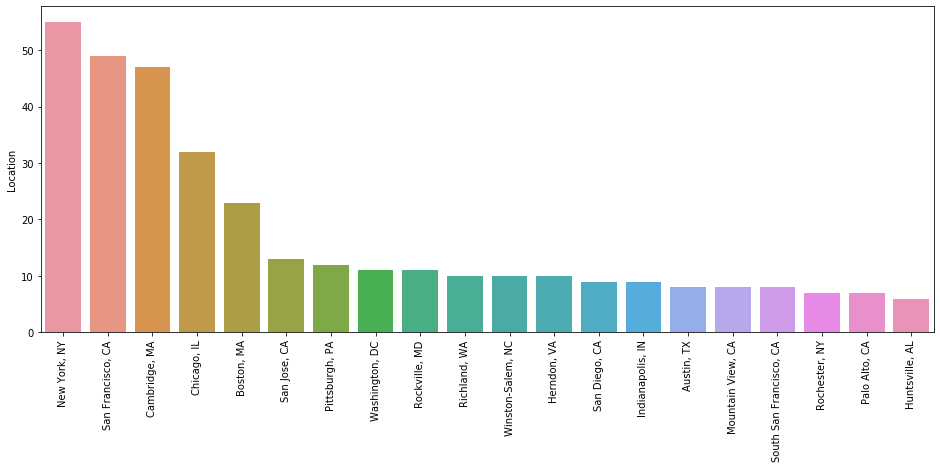

graph for Headquarters: total = 20


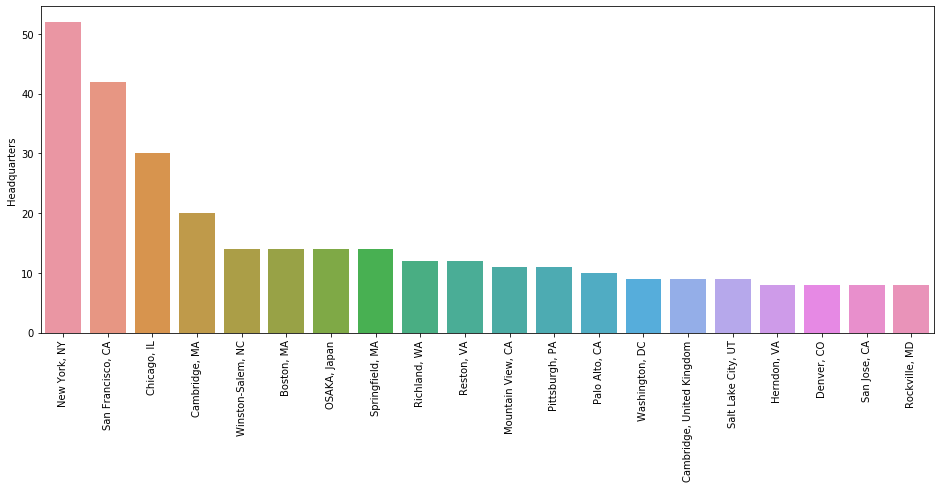

In [29]:
# Top 20 labels of 'Location' and 'Headquarters' columns
for col in ['Location', 'Headquarters',]:
    cat_num = df[col].value_counts()[0:20]
    print("graph for %s: total = %d" % (col, len(cat_num)))
    plt.figure(figsize=(16,6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

                           Average_Salary_Estimate
job_title                                         
Director                                168.833333
Machine learning Engineer               119.958333
Data Scientist                          108.312785
Manager                                 107.285714
Data Engineer                           105.403361
na                                       93.854167
Data Analyst                             70.060150


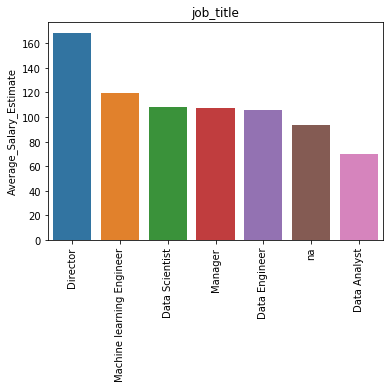

           Average_Salary_Estimate
seniority                         
Senior                  121.686364
na                       93.745935
Associate                79.907407
Jr                       71.000000


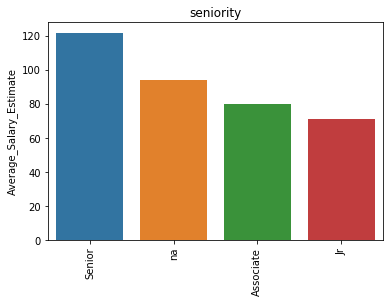

                         Average_Salary_Estimate
company_txt                                     
Gallu                                      237.5
Sage Intacc                                232.5
CA-One Tech Cloud                          225.0
Grand Round                                221.5
Credit Sesam                               205.0
The Climate Corporatio                     194.0
Grainge                                    179.5
Samsung Research Americ                    177.0
Nektar Therapeutic                         174.0
DTC                                        173.0


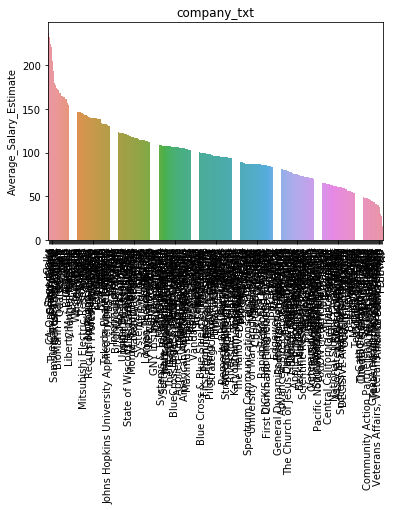

                         Average_Salary_Estimate
Headquarters                                    
Fremont, CA                           225.000000
Lake Forest, IL                       179.500000
Burbank, CA                           164.000000
Mill Valley, CA                       162.000000
Mountain View, CA                     158.818182
South San Francisco, CA               156.500000
Santa Clara, CA                       154.500000
Nashville, TN                         153.000000
Foster City, CA                       152.833333
Marlborough, MA                       150.700000


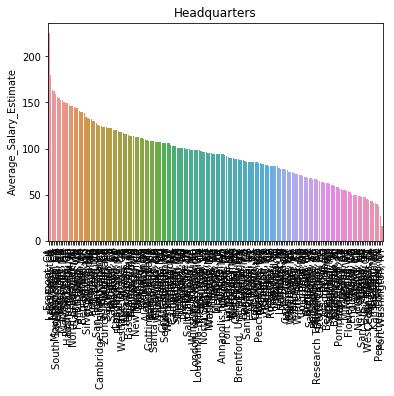

           Average_Salary_Estimate
job_state                         
CA                      123.513158
IL                      116.662500
DC                      110.181818
MA                      107.412621
NJ                      104.558824
MI                      100.250000
RI                      100.000000
NY                       98.652778
NC                       98.452381
MD                       97.357143


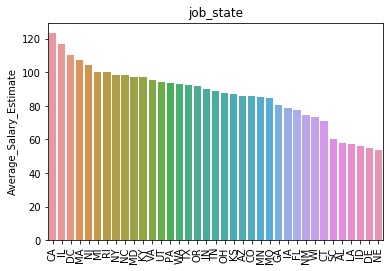

In [30]:
# Getting the maximum information out of columns by making tabels
def analytic_table(data, column):
    X=pd.pivot_table(data, values='Average_Salary_Estimate', index=column,
               aggfunc='mean').sort_values(by='Average_Salary_Estimate', ascending=False)
    print(X.head(10))
    plot=sns.barplot(y=X['Average_Salary_Estimate'],x=X.index)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(column)
    plot.set_xlabel('')
    plt.show()
    
for col in ['job_title', 'seniority', 'company_txt', 'Headquarters', 'job_state']:
    analytic_table(df, col)

###### From above charts and table we can gain the valuable information regarding criteria where average salary is maximum

                         Average_Salary_Estimate
company_txt                                     
Gallu                                      237.5
Sage Intacc                                232.5
CA-One Tech Cloud                          225.0
Grand Round                                221.5
Credit Sesam                               205.0
The Climate Corporatio                     194.0
Grainge                                    179.5
Samsung Research Americ                    177.0
Nektar Therapeutic                         174.0
DTC                                        173.0
Two Sigm                                   172.0
BioMarin Pharmaceutica                     168.0
Confluen                                   168.0
Quartet Healt                              165.0
Samba T                                    164.5
Zest A                                     164.0
Wis                                        163.5
Adob                                       162.0
Glassdoo            

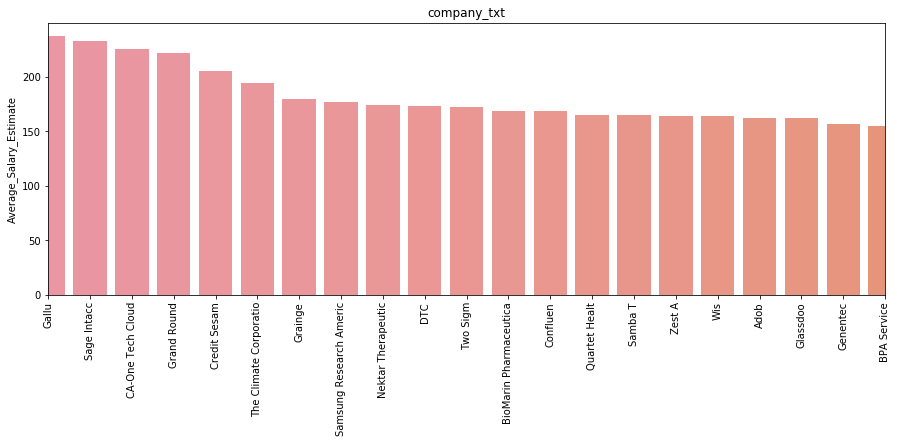

                         Average_Salary_Estimate
Headquarters                                    
Fremont, CA                           225.000000
Lake Forest, IL                       179.500000
Burbank, CA                           164.000000
Mill Valley, CA                       162.000000
Mountain View, CA                     158.818182
South San Francisco, CA               156.500000
Santa Clara, CA                       154.500000
Nashville, TN                         153.000000
Foster City, CA                       152.833333
Marlborough, MA                       150.700000
San Jose, CA                          149.625000
Redwood City, CA                      149.500000
Hamilton, Bermuda                     147.000000
Newark, NJ                            146.000000
Fort Lee, NJ                          145.666667
North Brunswick, NJ                   145.500000
Saint Louis, MO                       143.500000
Brisbane, CA                          143.500000
Falls Church, VA    

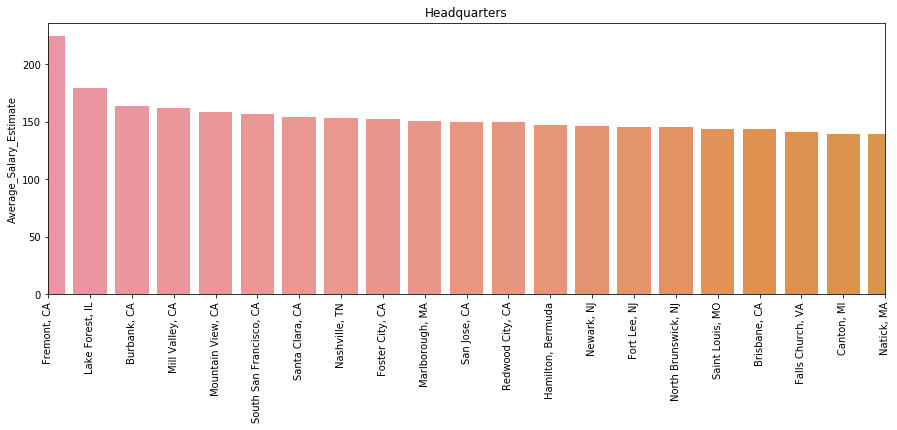

           Average_Salary_Estimate
job_state                         
CA                      123.513158
IL                      116.662500
DC                      110.181818
MA                      107.412621
NJ                      104.558824
MI                      100.250000
RI                      100.000000
NY                       98.652778
NC                       98.452381
MD                       97.357143
KY                       97.000000
VA                       95.621951
UT                       94.150000
PA                       93.803030
WA                       93.190476
TX                       92.464286
OR                       92.125000
IN                       90.300000
TN                       89.192308
OH                       87.571429


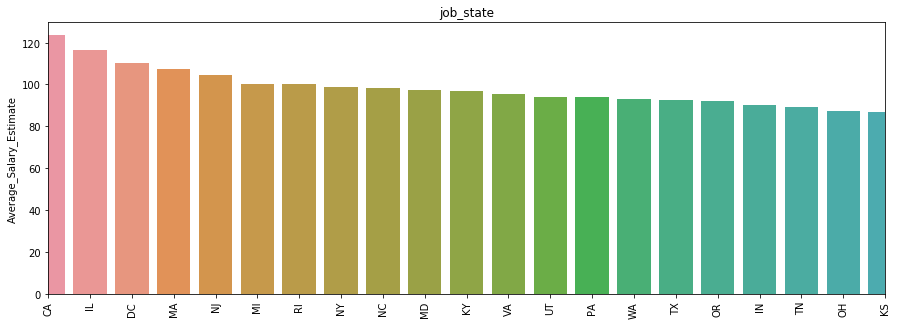

In [31]:
# company_txt', 'Headquarters', 'job_state'
# Getting Top 20
def analytic_table(data, column):
    X=pd.pivot_table(data, values='Average_Salary_Estimate', index=column,
               aggfunc='mean').sort_values(by='Average_Salary_Estimate', ascending=False)
    print(X.head(20))
    plt.figure(figsize=(15,5))
    plot=sns.barplot(y=X['Average_Salary_Estimate'],x=X.index)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(column)
    plot.set_xlabel('')
    plot.set_xlim(0,20)
    plt.show()
    
for col in ['company_txt', 'Headquarters', 'job_state']:
    analytic_table(df, col)

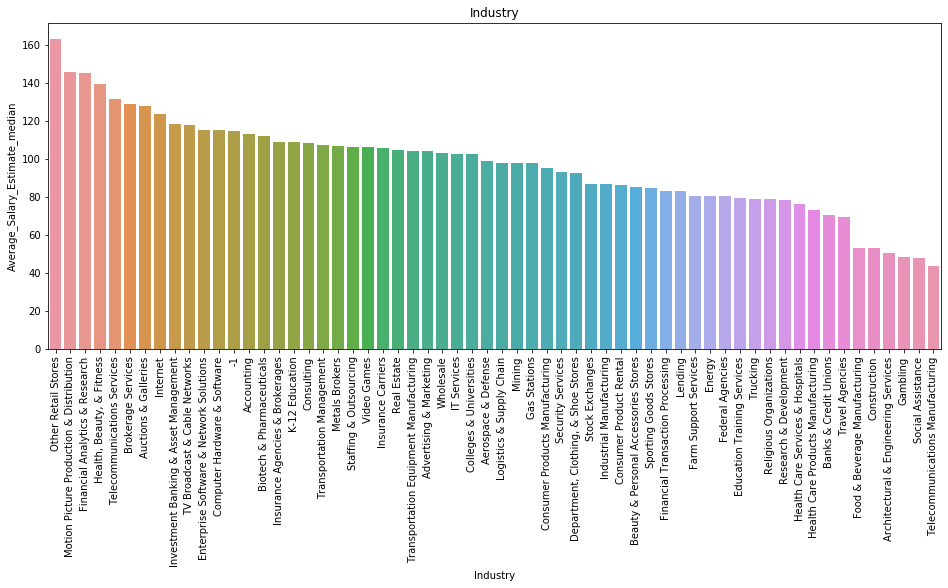

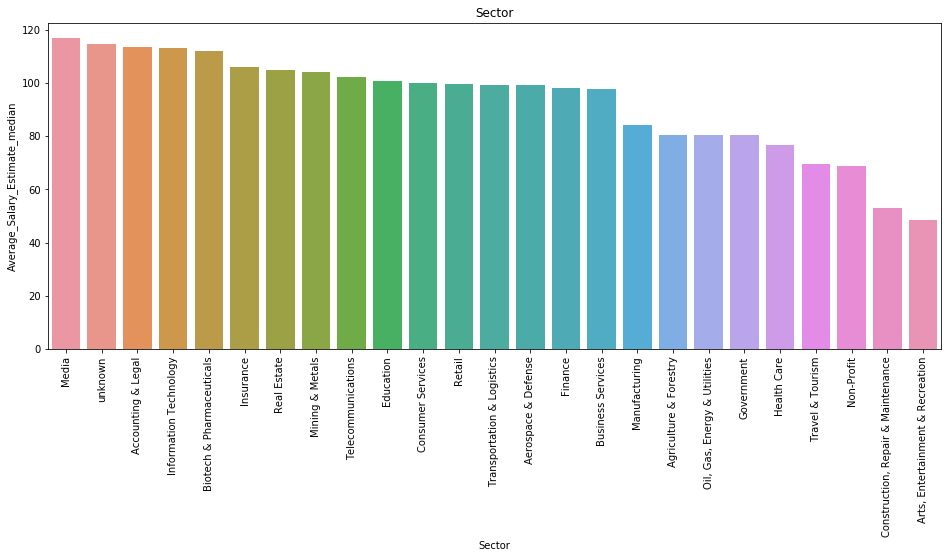

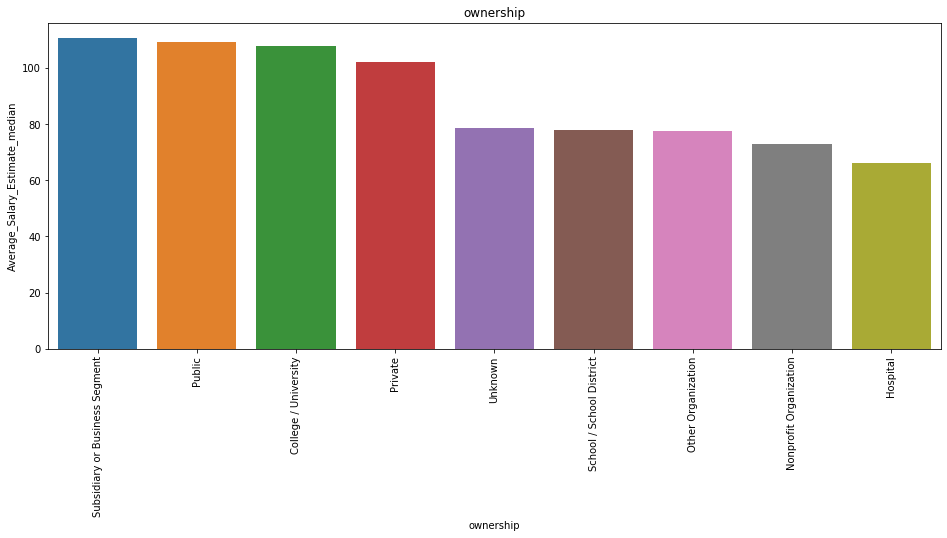

In [32]:
def visual_analyz(dataset, column):
    X=dataset.copy()
    x=df.groupby(column)['Average_Salary_Estimate'].mean().sort_values(ascending=False).index
    y=df.groupby(column)['Average_Salary_Estimate'].mean().sort_values(ascending=False).values
    plt.figure(figsize=(16,6))
    plot = sns.barplot(x=x , y=y)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(column)
    plot.set_xlabel(column)
    plot.set_ylabel('Average_Salary_Estimate_median')
    plt.show()

for col in ['Industry', 'Sector', 'ownership']:
    visual_analyz(df, col)

In [33]:
# Let's dig a little more in depth
pd.pivot_table(df, values='Average_Salary_Estimate', index=['job_title','seniority'],
               aggfunc='mean').sort_values(by='Average_Salary_Estimate', ascending=False)

,,Average_Salary_Estimate
job_title,seniority,
Director,na,168.833333
Data Scientist,Senior,130.309524
Data Engineer,Senior,124.689189
Machine learning Engineer,na,119.958333
Data Engineer,Associate,118.900000
Manager,na,107.285714
Data Scientist,Jr,106.500000
na,na,100.156250
Data Scientist,na,97.698556


In [34]:
pd.pivot_table(df,values='Average_Salary_Estimate', index = ['job_state', 'job_title', 'seniority'],
               aggfunc='count').sort_values(by='Average_Salary_Estimate', ascending=False)

,,,Average_Salary_Estimate
job_state,job_title,seniority,
CA,Data Scientist,na,54
MA,Data Scientist,na,43
CA,Data Scientist,Senior,31
NY,Data Scientist,na,29
MA,Data Scientist,Senior,28
CA,Data Analyst,na,23
MD,Data Scientist,na,20
NY,Data Scientist,Senior,16
TX,Data Scientist,na,15


In [35]:
# State wise jobs opening for different job position
pd.pivot_table(df,values='Average_Salary_Estimate', index = ['job_state'], columns='job_title',
               aggfunc='count')

job_title,Data Analyst,Data Engineer,Data Scientist,Director,Machine learning Engineer,Manager,na
job_state,,,,,,,
AL,5.0,1.0,1.0,NaN,NaN,NaN,1.0
AZ,1.0,5.0,1.0,NaN,NaN,NaN,2.0
CA,25.0,25.0,90.0,NaN,4.0,2.0,6.0
CO,1.0,3.0,6.0,NaN,1.0,NaN,NaN
CT,3.0,NaN,2.0,NaN,NaN,NaN,NaN
DC,2.0,4.0,5.0,NaN,NaN,NaN,NaN
DE,NaN,NaN,6.0,NaN,NaN,NaN,NaN
FL,6.0,3.0,7.0,NaN,NaN,NaN,NaN
GA,NaN,NaN,6.0,NaN,NaN,NaN,NaN


In [36]:
# State wise average salary of different job positions 
pd.pivot_table(df,values='Average_Salary_Estimate', index = ['job_state'], columns='job_title',
               aggfunc='mean').round(2)

job_title,Data Analyst,Data Engineer,Data Scientist,Director,Machine learning Engineer,Manager,na
job_state,,,,,,,
AL,62.20,65.00,39.50,NaN,NaN,NaN,48.00
AZ,55.00,79.50,69.50,NaN,NaN,NaN,124.50
CA,76.24,129.54,133.82,NaN,163.5,142.50,107.83
CO,29.50,99.00,85.83,NaN,100.5,NaN,NaN
CT,62.50,NaN,84.00,NaN,NaN,NaN,NaN
DC,63.50,85.00,149.00,NaN,NaN,NaN,NaN
DE,NaN,NaN,55.00,NaN,NaN,NaN,NaN
FL,47.50,91.83,97.36,NaN,NaN,NaN,NaN
GA,NaN,NaN,80.67,NaN,NaN,NaN,NaN


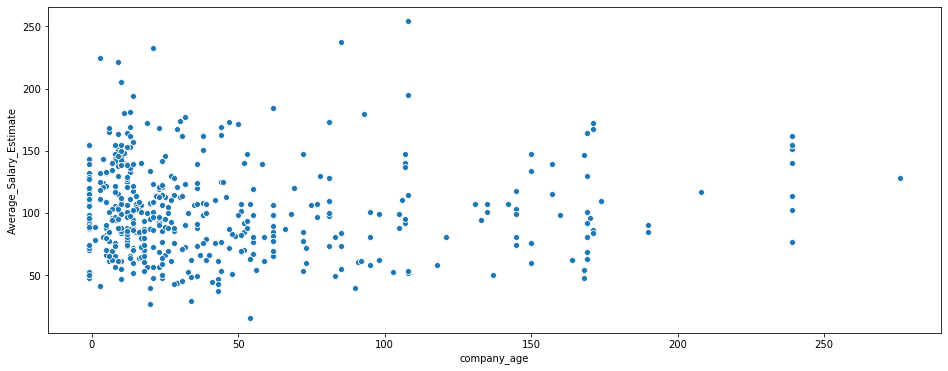

In [37]:
plt.figure(figsize=(16,6))
sns.scatterplot(df['company_age'], df['Average_Salary_Estimate'])
plt.show()

* Age of the company does not matter with respect to the salary offers they are coming up with

In [38]:
pd.pivot_table(df, index = 'Revenue', columns = 'python', values = 'Average_Salary_Estimate', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [39]:
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,Provided_Salary,Min_Salary_Estimate,Max_Salary_Estimate,Average_Salary_Estimate,company_txt,job_state,same_state,company_age,python,excel,sas,spark,tableau,aws,big data,R_lang,ownership,job_title,seniority,competitor_counts
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Researc,NM,0,47,1,1,1,0,1,0,0,0,Private,Data Scientist,na,0
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical Syste,MD,0,36,1,0,0,0,0,0,0,0,Other Organization,Data Scientist,na,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe,FL,1,10,1,1,1,1,0,0,1,1,Private,Data Scientist,na,0
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNN,WA,1,55,1,0,0,0,0,0,0,0,Public,Data Scientist,na,3
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solution,NY,1,22,1,1,1,0,0,0,0,0,Private,Data Scientist,na,3
5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\r\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOn,TX,1,20,1,1,0,0,0,1,0,0,Public,Data Scientist,na,3
6,Data Scientist,54-93,Job Description\r\n\r\n**Please only local can...,4.1,ClearOne Advantage\r\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,73.5,ClearOne Advantag,MD,1,12,0,1,0,0,0,0,0,0,Private,Data Scientist,na,0
7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\r\nOv...,3.8,Logic20/20\r\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,114.0,Logic20/2,CA,0,15,1,1,0,1,0,1,1,0,Private,Data Scientist,na,0
8,Research Scientist,38-84,SUMMARY\r\n\r\nThe Research Scientist I will b...,3.3,Rochester Regional Health\r\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,61.0,Rochester Regional Healt,NY,1,6,0,0,0,0,0,0,0,0,Hospital,Data Scientist,na,0
9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\r\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,140.0,<intent,NY,1,11,1,0,0,1,0,0,1,0,Private,Data Scientist,na,2


In [40]:
df.to_csv('cleaned_data.csv', index=False)